In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense 
import matplotlib.pyplot as plt 

Importing the dataset

In [2]:
data = pd.read_csv("NETFLIX_monthly.csv") 
stock_prices = data['Close'].values.reshape(-1, 1) 

Transformig the data to 0-1

In [3]:
scaler = MinMaxScaler() 
stock_prices_scaled = scaler.fit_transform(stock_prices) 

In [4]:
train_size = int(len(stock_prices_scaled) * 0.8) 
train_data, test_data = stock_prices_scaled[:train_size], stock_prices_scaled[train_size:] 

Create a sequence and label for training

In [10]:
def create_sequences (data, seq_length): 
    sequences, labels = [],[]
    for i in range (len (data ) - seq_length): 
        seq = data [i : i+seq_length] 
        label = data [ i+seq_length] 
        sequences . append ( seq) 
        labels . append ( label ) 
    return np. array( sequences ) , np . array( labels ) 


In [11]:
seq_length = 10 # Adjust as needed 
X_train, y_train = create_sequences(train_data, seq_length) 
X_test, y_test = create_sequences (test_data, seq_length)

Bulding LSTM model

In [17]:
model = Sequential( [ 
     LSTM( 50, activation= 'relu' , input_shape=(seq_length, 1)),
     Dense( 1 )]) 
model.compile (optimizer= 'adam' , loss= 'mean_squared_error' ) 

In [18]:
model.fit(X_train,y_train,epochs = 50,batch_size = 32,validation_data=(X_test,y_test))

Epoch 1/50
7/7 [==============================] - 6s 64ms/step - loss: 0.0235 - val_loss: 0.2784
Epoch 2/50
7/7 [==============================] - 0s 14ms/step - loss: 0.0132 - val_loss: 0.1699
Epoch 3/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0088 - val_loss: 0.1010
Epoch 4/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0060 - val_loss: 0.0598
Epoch 5/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0041 - val_loss: 0.0367
Epoch 6/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0025 - val_loss: 0.0278
Epoch 7/50
7/7 [==============================] - 0s 14ms/step - loss: 0.0014 - val_loss: 0.0342
Epoch 8/50
7/7 [==============================] - 0s 12ms/step - loss: 9.3578e-04 - val_loss: 0.0520
Epoch 9/50
7/7 [==============================] - 0s 13ms/step - loss: 9.4628e-04 - val_loss: 0.0487
Epoch 10/50
7/7 [==============================] - 0s 13ms/step - loss: 8.6772e-04 - val_loss: 0.0353
Epoch 11/50
7/7 [

In [19]:
train_predict = model.predict(X_train)
test_prediction = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [20]:
train_predict = scaler.inverse_transform(train_predict)
test_prediction = scaler.inverse_transform(test_prediction)

Ploting the graph

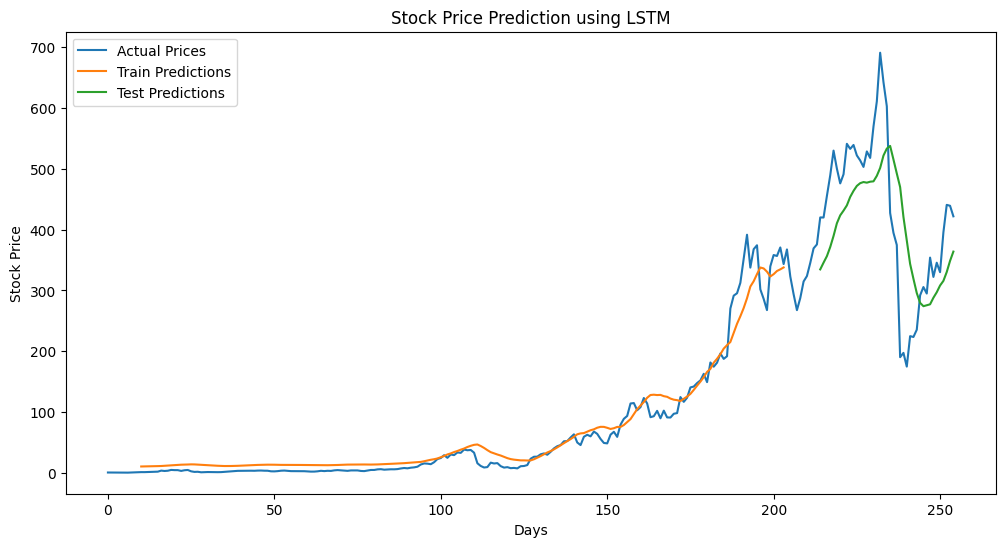

In [24]:
plt.figure(figsize=(12, 6)) 
plt.plot(stock_prices, label='Actual Prices') 
plt.plot(np.arange(seq_length, len(train_data)), train_predict, label='Train Predictions') 
plt.plot(np.arange(len(train_data) + seq_length, len(stock_prices)), test_prediction, label='Test Predictions') 
plt.legend() 
plt.xlabel('Days') 
plt.ylabel('Stock Price') 
plt.title('Stock Price Prediction using LSTM') 
plt.show() 